<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" alt="Titanic" width = "500"></center>

# Introduction
***
<font size="5"><center><em> "The Titanic case has been used too often and feels dull" </em></center></font>

But overthinking only kept my data project stuck in emptiness. Finally, I decided to push forward and disregard that notion. Why not kickstart my data science project with the Titanic case?
In that decision, I found newfound inspiration. I laid out the steps, prepared my Python notebook, and began delving into the Titanic dataset. Despite the debated boredom, I discovered intriguing findings that sharpened my data science skills.<br>
So, let's leave behind the common mindset and dare to face the challenge. This is my first step towards building an extraordinary data science portfolio.

## About Titanic Disaster
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.<br>
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

## Objectives
- Do an **Exploratory Data Analysis (EDA)** of Titanic Disaster
- Build a **predictive model** to predict the chances of passengers survival
- **KICKSTART FOR MY DATA SCIENCE PROJECT 🔥🔥🔥**

# Part 1: Importing Necessary Library and Dataset 📊
***
To start this project, first we need to prepare the required libraries and datasets

## 1.1 Importing Library
Want to expolore and analyze data more easily❔❔❔<br>
The answer lies in using **libraries**❗❗❗

In this section we will import libraries to assist us in analyzing the Titanic data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') ## To ignore warning

from collections import Counter # To help detect outlier

%config InlineBackend.figure_format = 'retina' 
# %matplotlib inline
## the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1b. Loading Dataset
There are three csv on this project, but we will only use two of them  (train.csv & test.csv).

**Data Training** (train.csv): The training data is used to train the machine learning model by feeding it labeled examples and enabling it to capture patterns and relationships between input features and corresponding labels.

**Data Test**(test.csv): The test data is a separate dataset used to evaluate the performance of the trained model by comparing its predictions against the true labels, allowing us to assess how well the model can generalize and make accurate predictions on unseen data.

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = pd.concat([train_df.drop('Survived',1),test_df])

# 2. Overview Data 🔎
***
Let's look at the data in general starting from its shape, what columns are available, summary statistics, and so on

## 2a. An Overview of The Dataset

### Training Dataset (train.csv)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Test Dataset (test.csv)

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In general there is no big difference between **Data Training** and **Data Test**. </br>However, there is one very clear difference between these two data, which is that the test data does not have a `survived` column. This is not a problem because later we will fill in the `survived` column in the test data using the predicted results that we will make later

## 2b. About Dataset

Now let's look at the features of the dataset and its types:

### Categorical
* **Nominal** (Categories or group that have no intrinsic order or rank)
 * **Cabin** (Cabin Number)
 * **Embarked** (Port of Embarkation)
 * **Sex**
 
* **Ordinal** (Categories or group that have intrinsic order or rank)
 * **Pclass** (Ticket Class)
   * 1 = 1st / Upper
   * 2 = 2nd / Middle
   * 3 = 3rd / Lower
 

### Numeric
* **Discrete**
 * **Passenger ID** (Unique ID for each passenger)
 * **SibSp** (# of siblings / spouse aboard the Titanic)
 * **Parch**(# of parents / children aboard the Titanic)
 * **Survival**
   * **0** = Did Not Survived
   * **1** = Survived

* **Continuous**
 * **Age** (Age in years)
 * **Fare** (Passenger fare)

### Text
* **Ticket** (Ticket Number)
* **Name** (Passenger Name)

## 2c. Tableau Visualization
Before I made this notebook I've tried to play around using the same data using Tableau. I did this in order to get another perspective when exploring data. Apart from that, by using Tableau, we can also create interactive dashboards.

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1688721483092' style='position: relative'><noscript><a href='#'><img alt='Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ov&#47;OverviewTitanicTrainingDataset&#47;Dashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='OverviewTitanicTrainingDataset&#47;Dashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ov&#47;OverviewTitanicTrainingDataset&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1688721483092');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1600px';vizElement.style.height='927px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# 3. Cleaning the Data 🧹
***
At this section we will cleaning data from **Outlier, Missing Values, and Inconsistent Data**

## 3a. Outlier
*Outlier is a person, thing, or fact that is very different from other people, things, or facts, so that it cannot be used to draw general conclusion*

At this project, I'll use [Interquartile Range](https://en.wikipedia.org/wiki/Interquartile_range) method to detect outliers

In [10]:
# Make a function to detect outliers
def detect_outliers(df,features):
    outliers_indices = []
    
    for col in features:
        # 1st quartile
        Q1 = np.percentile(df[col],25)
        # 3rd quartile
        Q3 = np.percentile(df[col],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # Detect outlier and their indices
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        # Store Indices
        outliers_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(i for i, v in outliers_indices.items() if v > 1)
    
    return multiple_outliers

In [11]:
 train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [12]:
print("The shape of the dataset **before** the outliers are removed " + str(train_df.shape))

train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]), axis = 0).reset_index(drop=True)

print("The shape of the dataset after the outliers are removed " + str(train_df.shape))

The shape of the dataset **before** the outliers are removed (891, 12)
The shape of the dataset after the outliers are removed (810, 12)


## 3b. Missing Values
***Nothing is perfect in this world***, and neither with this dataset. There are some missing values on this dataset. So let's handle this!

In [13]:
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total,percentage], axis = 1, keys = ['Total','Percentage'])

In [14]:
missing_values(train_df)

,Total,Percentage
Cabin,645,79.63
Age,166,20.49
Embarked,2,0.25
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


There are three features that have null values. I'll using different method to handle these three features, because sometimes different features need different ways to handle. Let's start with the smallest one, **Embarked**

### Embarked

In [15]:
def percent_value_counts(df,feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    total.columns = ["Total"]
    percent.columns = ["Percentage"]
    return pd.concat([total,percent], axis=1)

In [16]:
percent_value_counts(train_df,'Embarked')

,Total,Percentage
S,581,71.73
C,154,19.01
Q,73,9.01
NaN,2,0.25


So `Embarked` has 2 missing values. To handle this, I will use the port with the most passengers to fill the missing values

In [17]:
mode_embarked = train_df['Embarked'].mode()[0]

train_df['Embarked'].fillna(mode_embarked,inplace=True)

In [18]:
percent_value_counts(train_df,'Embarked')

,Total,Percentage
S,583,71.98
C,154,19.01
Q,73,9.01


### Age
Actually in a simple way we can assign the mean age of the dataset. But as we can see earlier there are a lot of passenger from different group ages. I also can't assign a kid with the mean age the dataset right?

So to handle missing values in this feature, I need to look for another information that will help me. We can check the `Name` feature, with this we can see that the names have a salutation like Mr or Mrs. In the end we can assign the mean values of Mr or Mrs to the respective group
***
*This method are inspired by Aswhini Swain on EDA To Prediction ([DieTanic](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic)).*

In [19]:
# Create new column 'Initial'
train_df['Initial'] = 0

# Extract salutation to 'Initial'
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.') #for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [20]:
# Check initial by gender
pd.crosstab(train_df.Initial, train_df.Sex).T.style.background_gradient('summer_r')

Initial,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,
female,0,1,0,1,0,1,0,0,154,2,1,0,114,1,0,0
male,2,0,1,6,1,0,2,19,0,0,0,497,0,0,6,1


As we can see, there are lots of greetings in this "name" feature. But for now we will group them into several groups

In [21]:
# Replace some initial to several groups
train_df['Initial'].replace(['Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],['Other','Mrs','Mr','Mr','Other','Mrs','Mr','Miss','Miss','Miss','Other','Mr'],inplace=True)

In [22]:
# Check the average age by initial groups
train_df.groupby('Initial')['Age'].mean()

Initial
Master     3.808824
Miss      23.046875
Mr        32.535806
Mrs       35.101010
Other     45.888889
Name: Age, dtype: float64

Let's now assign this average value to each NaN value in each of the initial groups

In [23]:
# Create a function to fill the missing values based on the average of a group
def fill_missing_group_mean(df, group, col):
    # Calculate mean for every group
    average_col_by_group = df.groupby(group)[col].transform('mean')
    # FIll null values using mean for every group
    df[col].fillna(average_col_by_group, inplace=True)

In [24]:
fill_missing_group_mean(train_df,'Initial','Age')

In [25]:
# Let's see if there are still empty values in the "Age" feature or not
missing_values(train_df)

,Total,Percentage
Cabin,645,79.63
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


### Cabin
As we can see before there lots of null values on this feature and also many passengers have multiple cabins. So I'll drop this feature

In [26]:
train_df.drop(['Cabin'], axis=1, inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
805,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Other
806,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
807,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.046875,1,2,W./C. 6607,23.4500,S,Miss
808,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


# 4. Analysis of The Features 📝
***
In this section I will analyze each feature and also look for important findings for each feature

## 3a. Sex

In [27]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            64
        1           211
male    0           434
        1           101
Name: Survived, dtype: int64

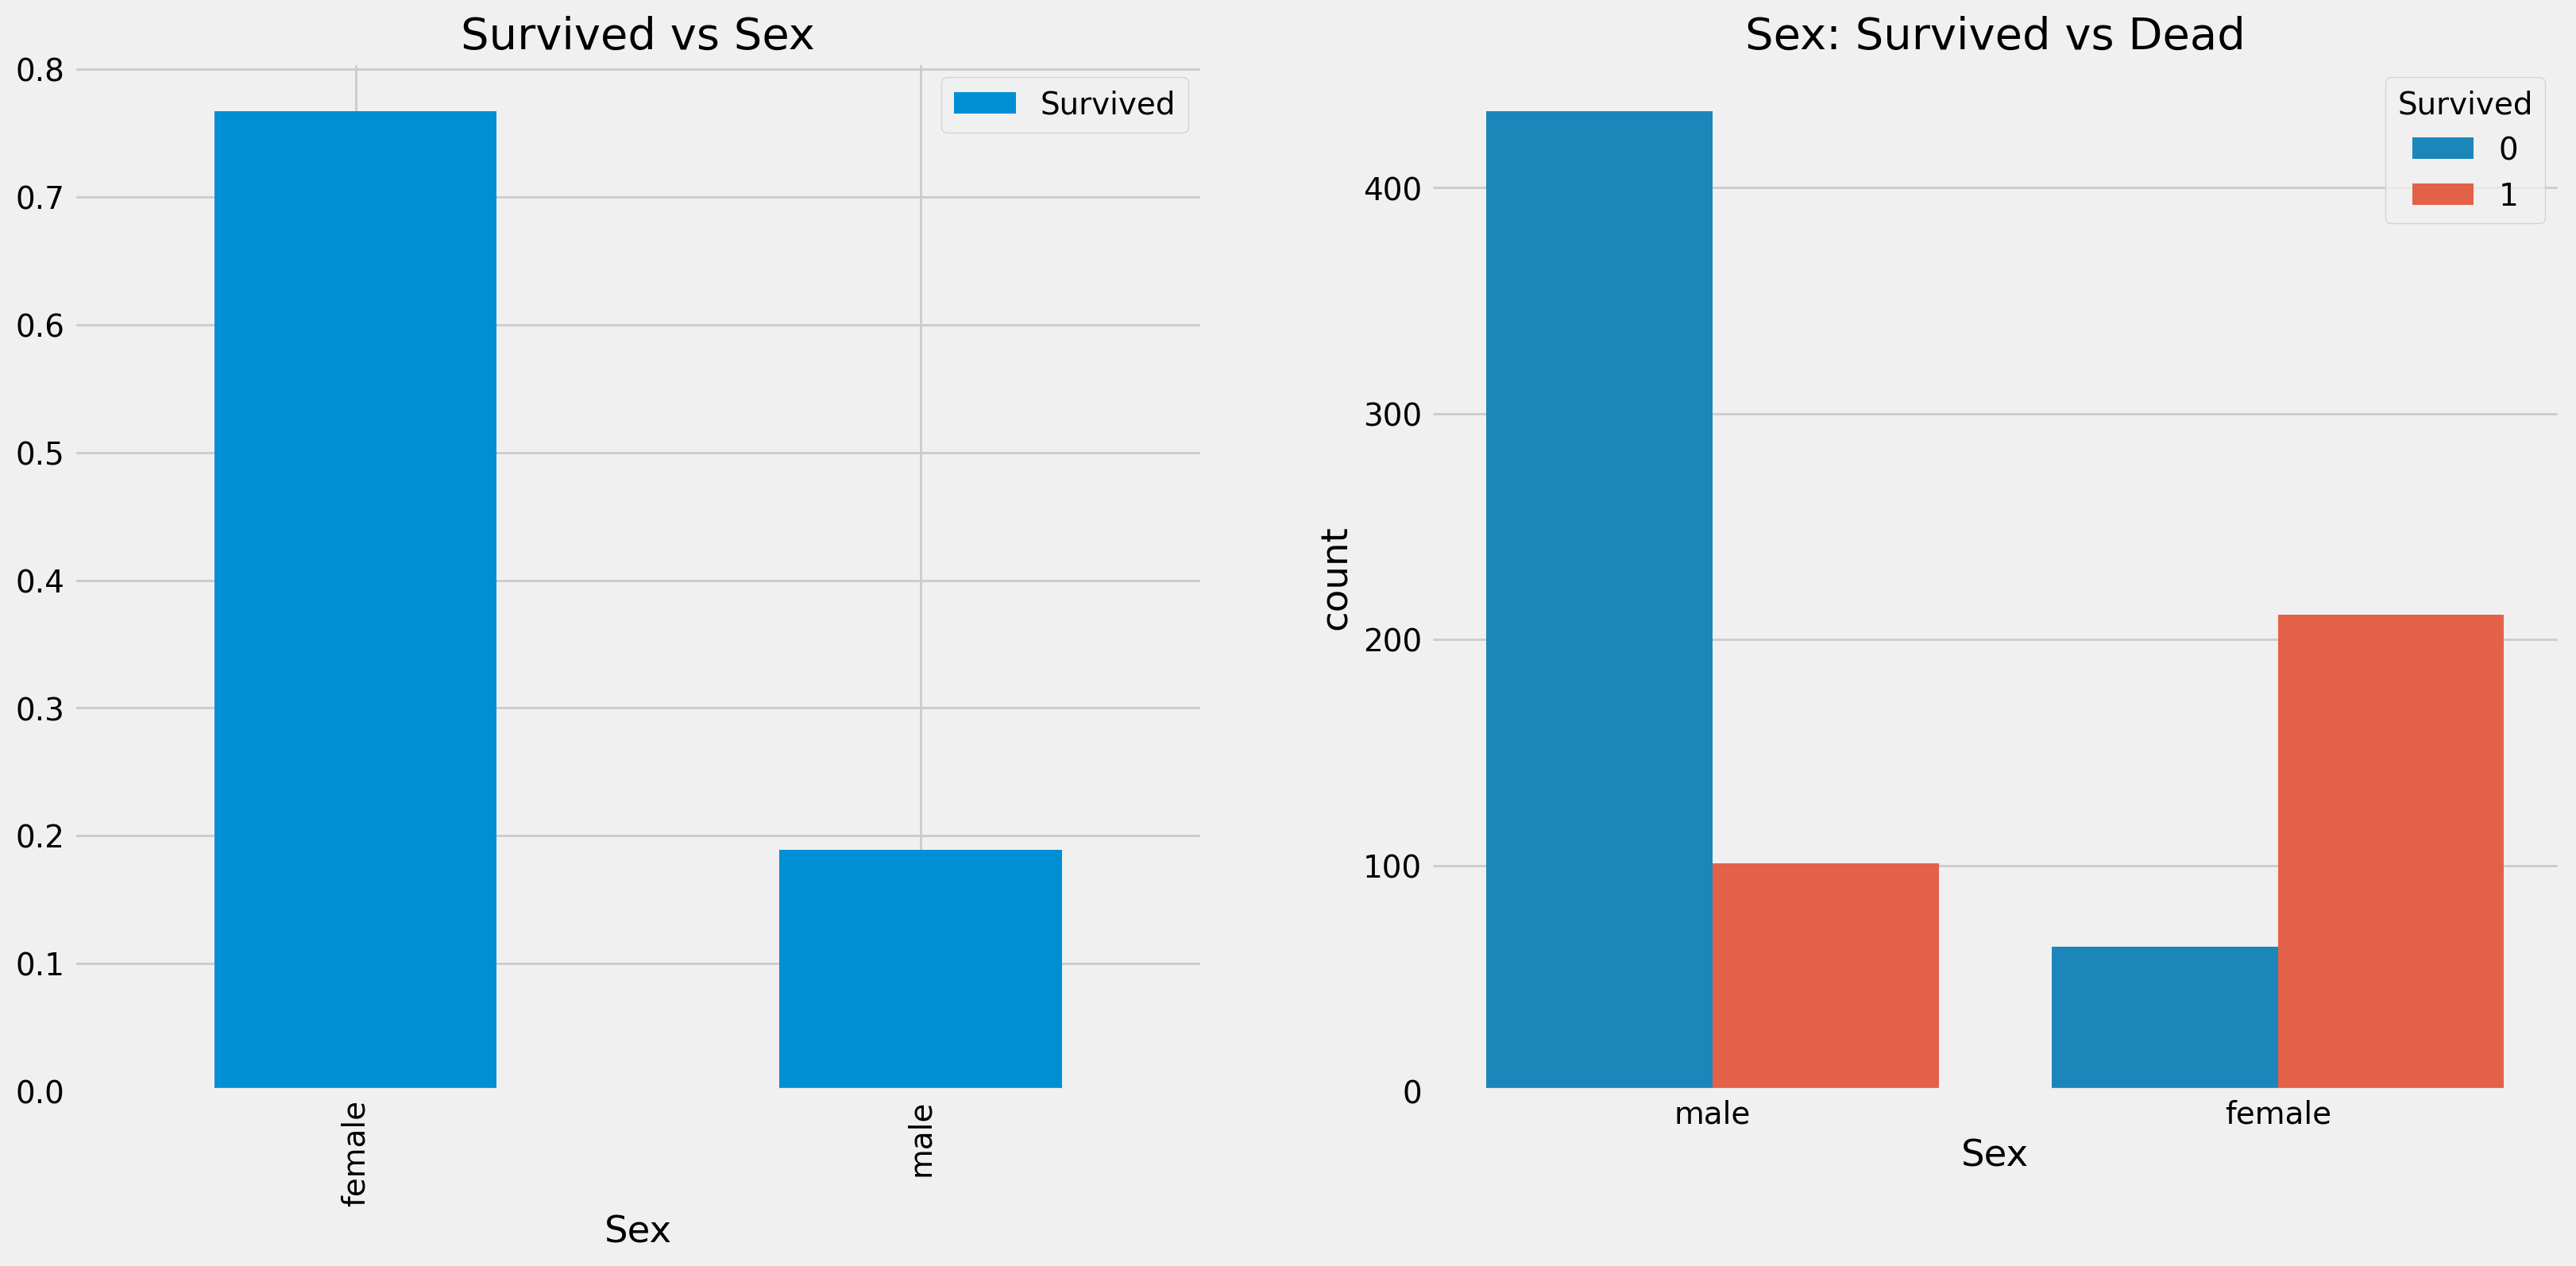

In [28]:
# Create figure to store visualization
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived',data=train_df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

As we can see, there are more men on board. However, the survivors are mostly women.

Maybe this happen because women are often the priority in emergency situations

## 3b. Pclass

In [29]:
pd.crosstab(train_df.Pclass, train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,67,109,176
2,97,87,184
3,334,116,450
All,498,312,810


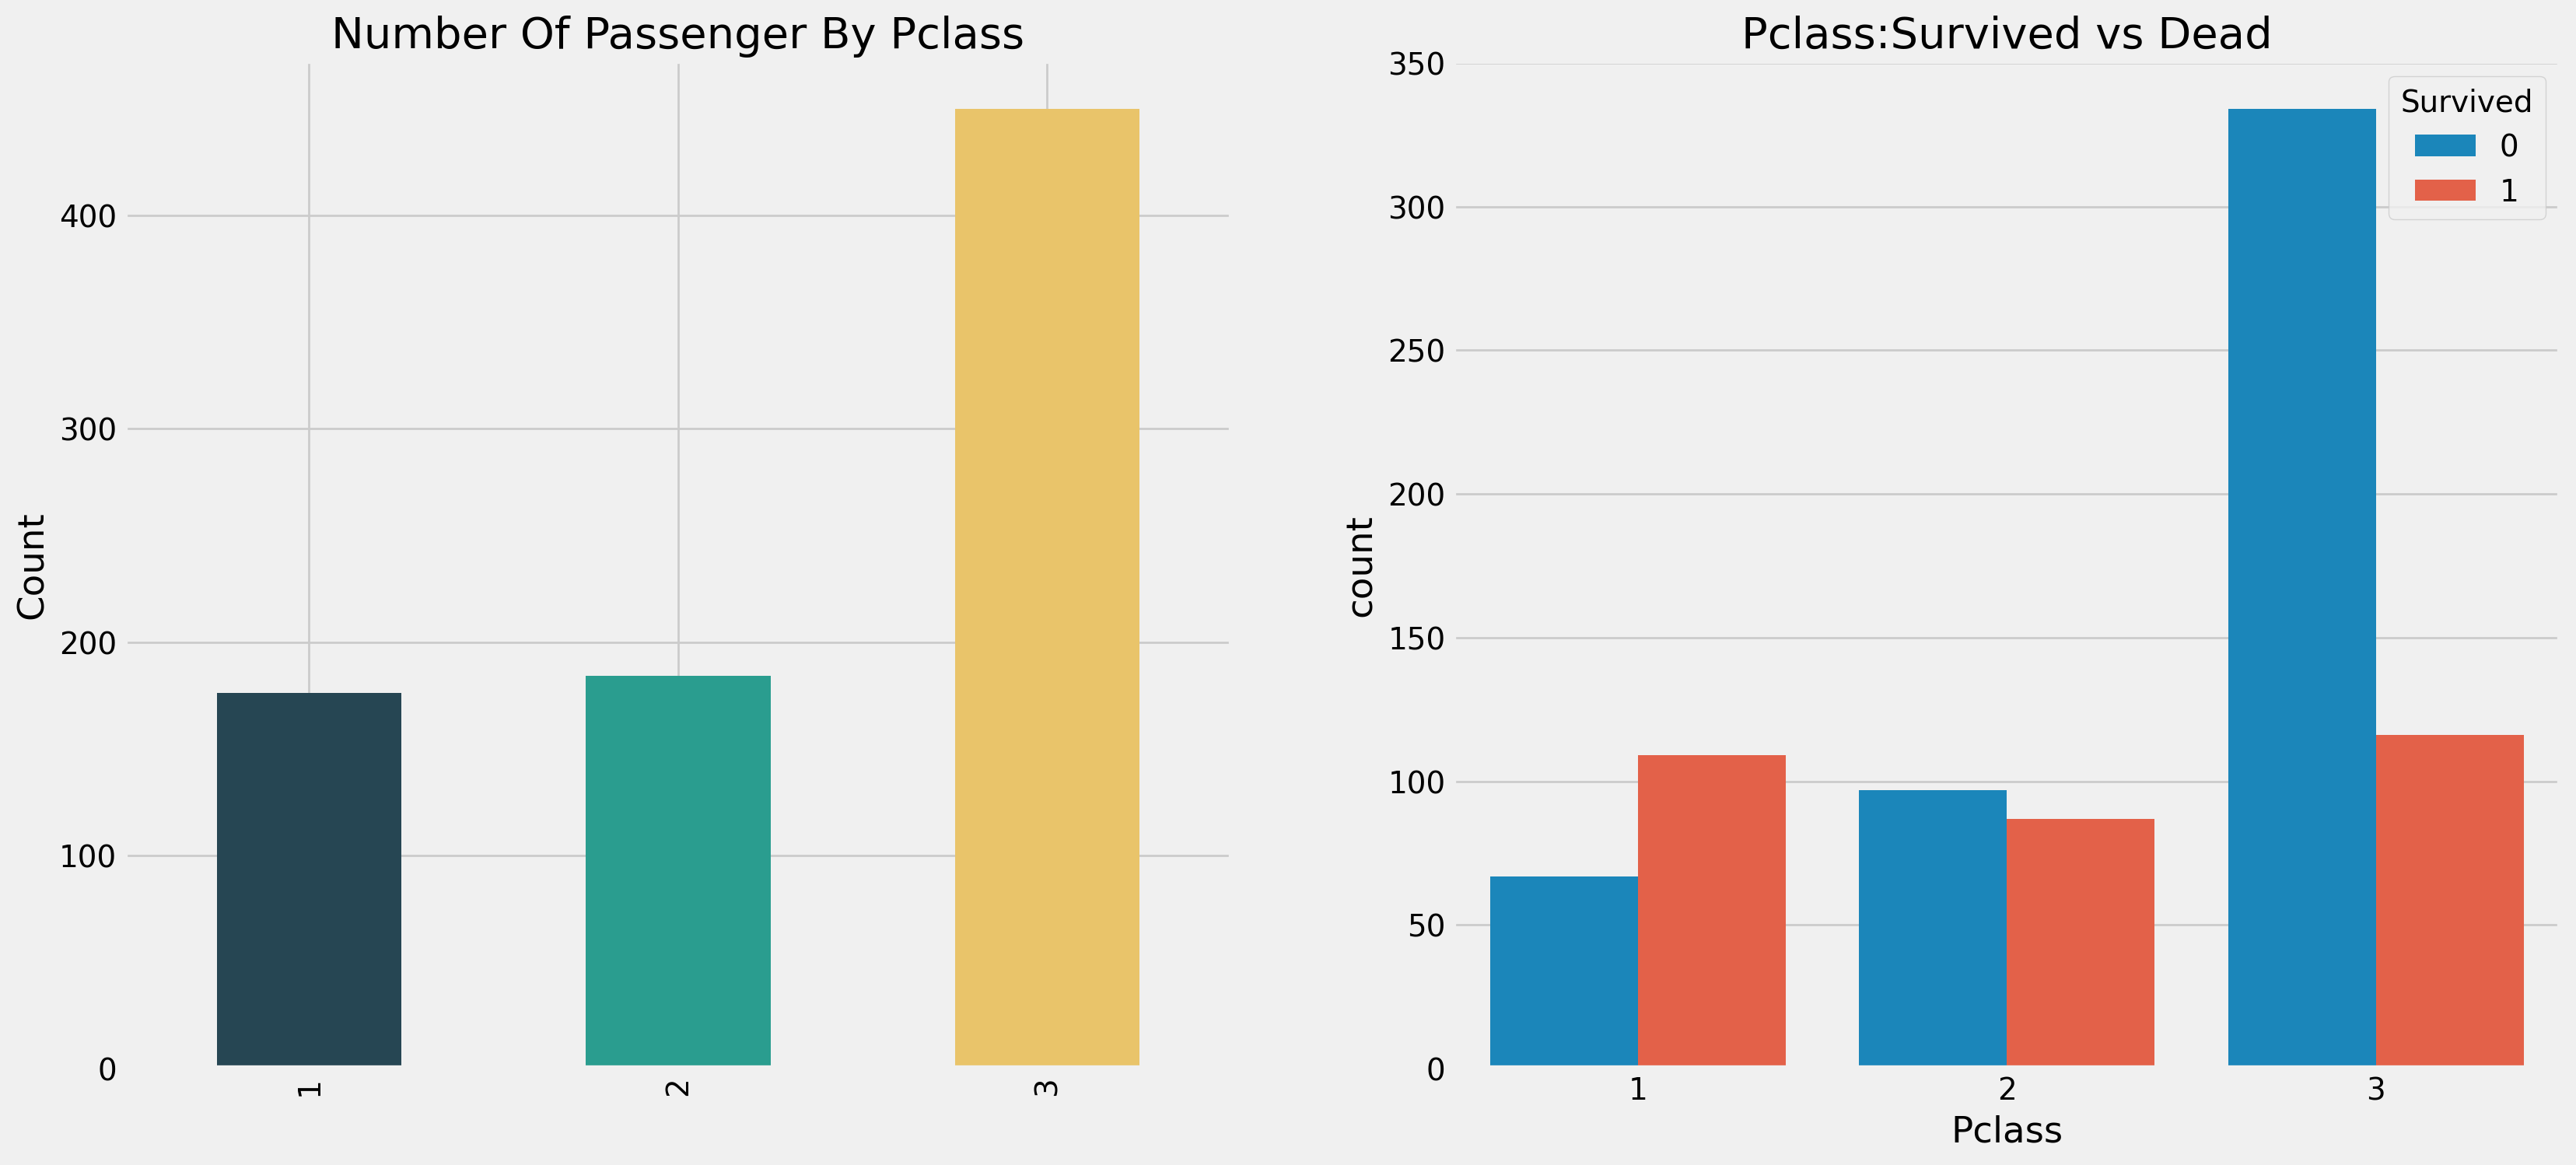

In [30]:
f, ax = plt.subplots(1,2, figsize=(18,8))
train_df['Pclass'].value_counts().sort_index().plot.bar(color=['#264653','#2A9D8F','#E9C46A'], ax=ax[0])
ax[0].set_title('Number Of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Money can't buy everything, they say. But on the Titanic, Pclass 1 passengers got the royal treatment during the rescue! This can be seen from the survival rate of **Pclass 1 which has the highest survival rate among the others, around 61.93%**🚢💫

Surprisingly, even with more people in **Pclass 3**, their survival rate was low, around **25.78%**. 😕

Pclass 1 had a 61.93% survival rate, while **Pclass 2** was close at **47.28%**. Money and status did matter, huh? 💰

Now, let's dive deeper! Time to check the survival rate by Sex and Pclass together. Let's uncover more interesting stuff! 😄🔍

In [31]:
pd.crosstab([train_df.Sex,train_df.Survived], train_df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

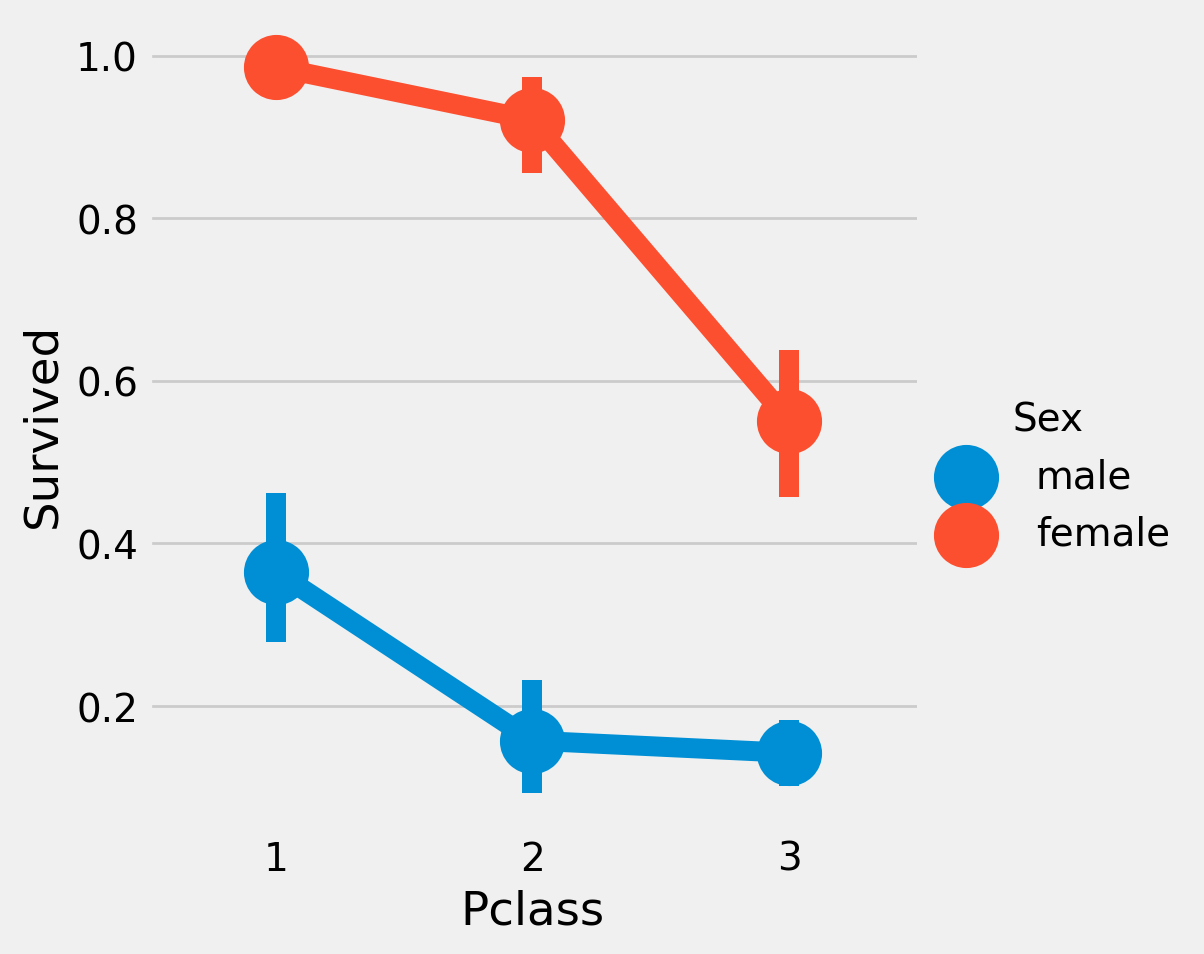

In [32]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=train_df, kind='point')
plt.show()

If we look at the cross tab above, it can be concluded that passengers with the **highest survival rate** are **female passengers in the upper class (Pclass 1)** with a survival rate of around **96.81%**

On the other hand, passengers with the **lowest survival rat**e are **male passengers who are in the lower class (Pclass 3)** with a survival rate of around **14.24%**.

Then if we look at the catplot regardless of class, female passengers are the priority when incidents occur

## 3c. Age

In [33]:
train_df.Age.describe()

count    810.000000
mean      30.526766
std       12.422611
min        0.420000
25%       23.000000
50%       31.000000
75%       35.101010
max       80.000000
Name: Age, dtype: float64

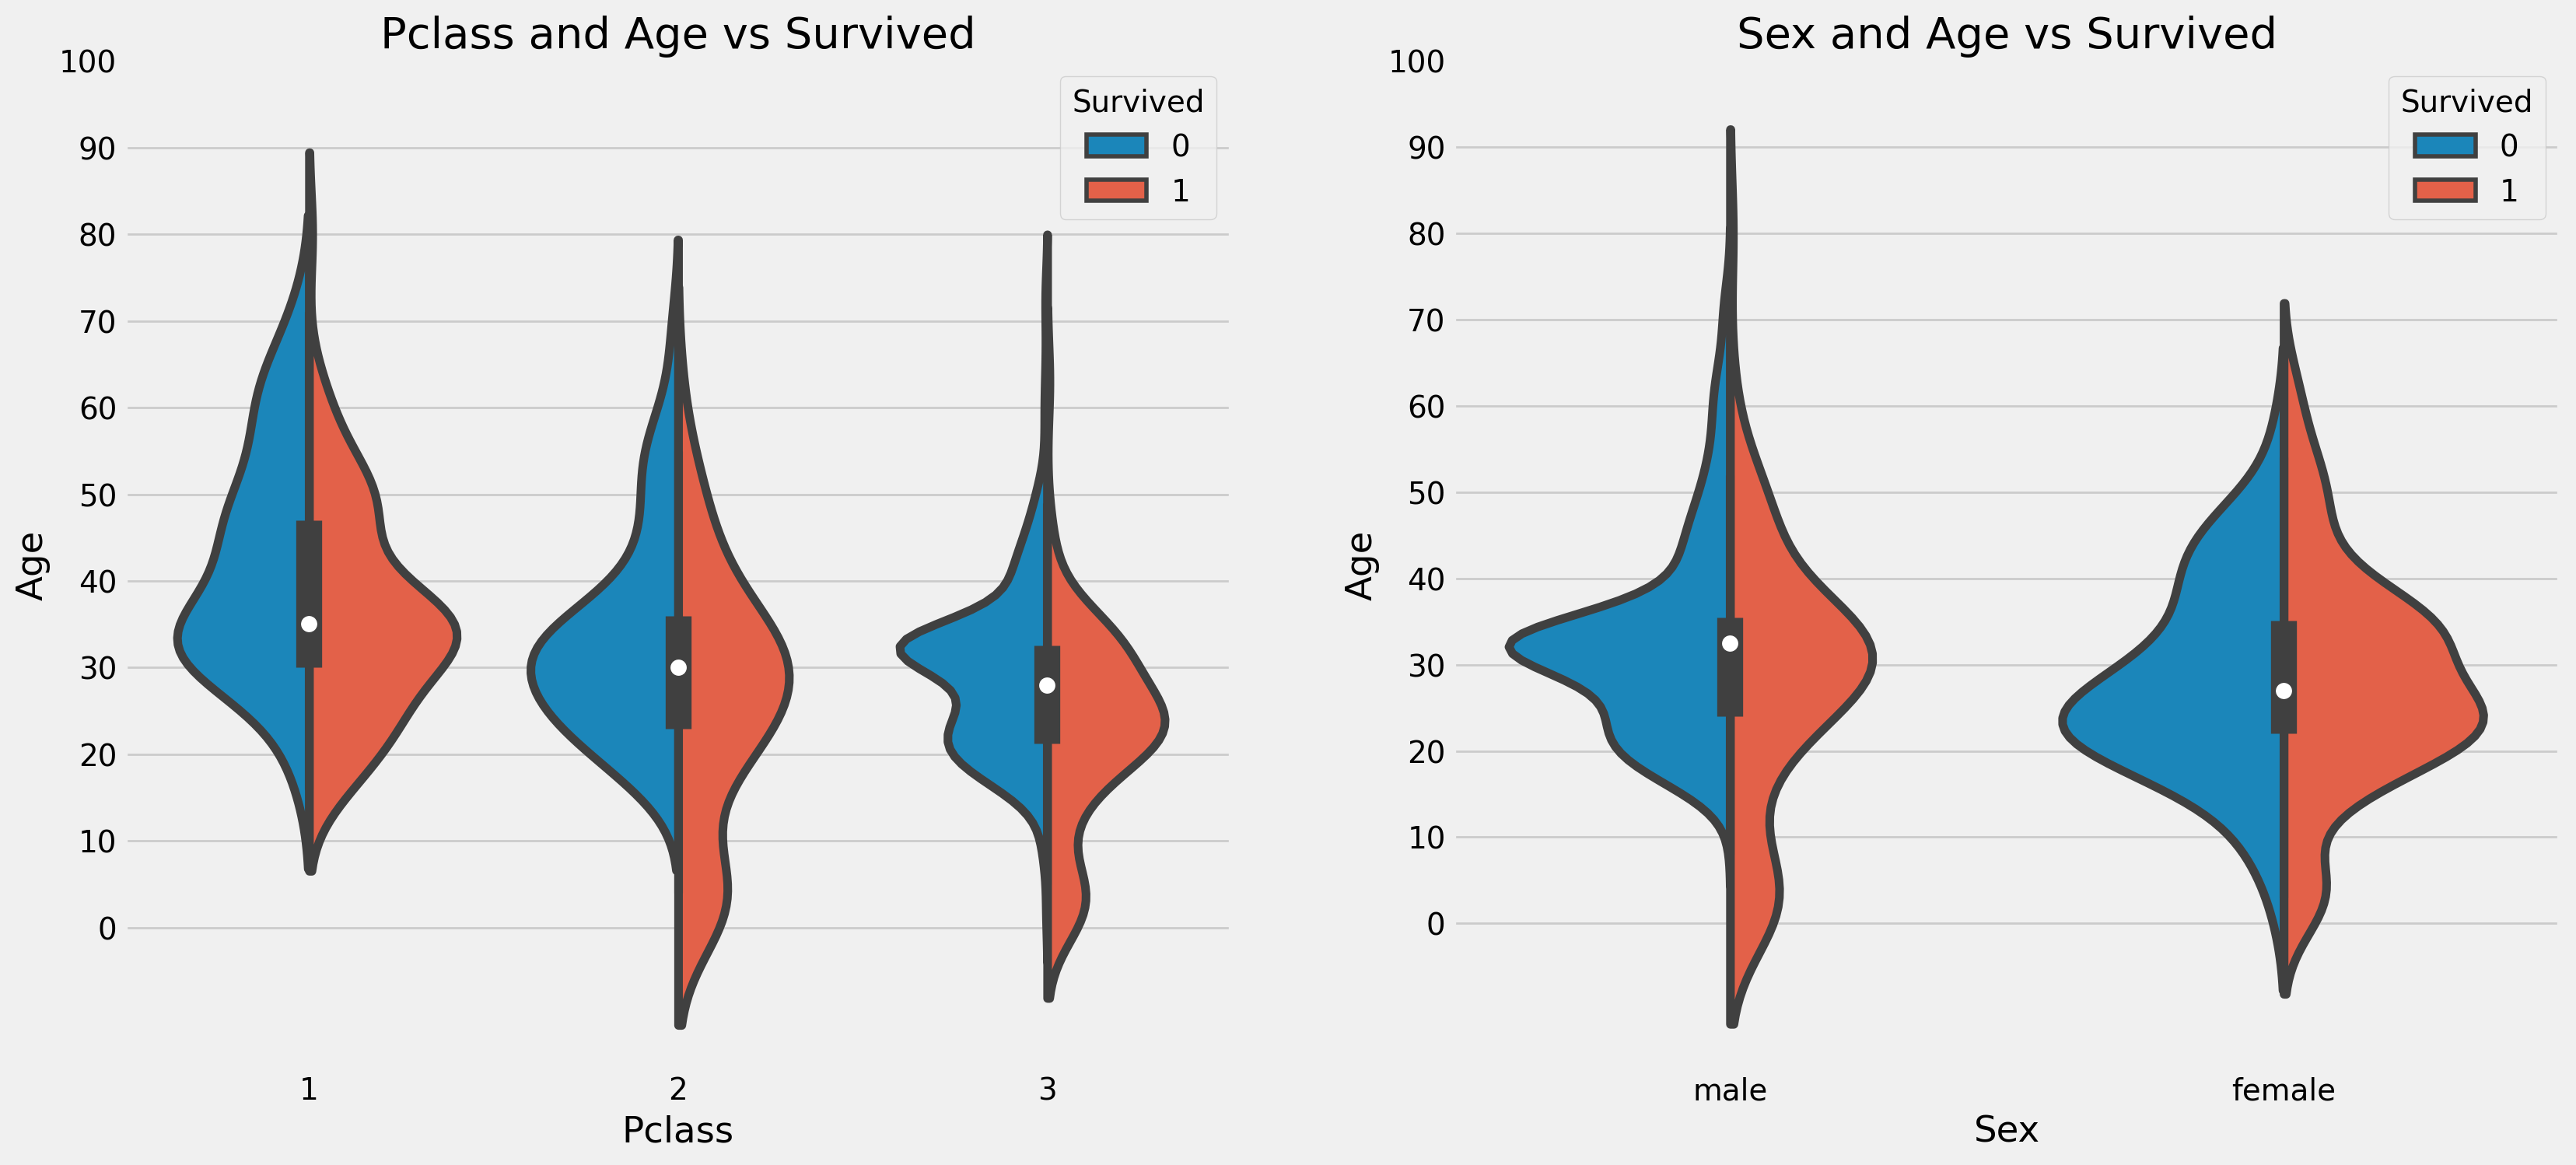

In [34]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

Based on the graph above, we can see that **children are a priority for rescue**. This relates to the "put women and children first" policy.

## 3d. Embarked

In [35]:
pd.crosstab([train_df.Embarked,train_df.Pclass], [train_df.Sex,train_df.Survived], margins=True).style.background_gradient(cmap='summer_r')

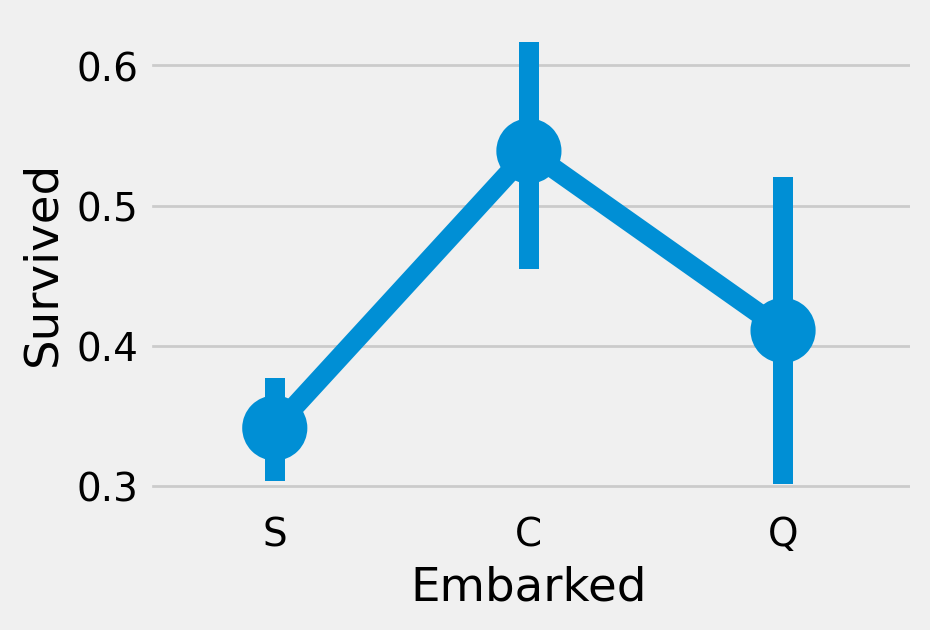

In [36]:
sns.catplot(x="Embarked", y="Survived", data=train_df, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()